# Trabalho final para a matéria: "Anotação de Textos e Processamento de Linguagem Natural (CIC0087)" 😊

## Reconhecimento de determinadas Entidades Nomeadas providas no corpo de contratos.

Extrato de contrato, extrato de convênio, aditamento de extrato de contrato, aviso de licitação, aviso de suspensão de licitação, aviso de revogação/anulação de licitação. 

## Sim, me dei conta de que o pedido da tarefa originalmente era a classificação de algumas entidades definidas, mas tentei com meus conhecimentos tentar classificar tudo para ver o que aconteceria, como um treinamento para a execução da classificação final.

### 👨‍💻 Aluno: Guilherme Braga (17/0162290)

#### 🐱 [Repositório no Github](https://github.com/gui1080/IA_CIC0087_Reconhecimento_de_Entidades_Nomeadas)

### Pegando os dados originais 🧐

In [1]:
from google.colab import files

# importar o arquivo de disco local, com o nome original "contratos.csv"
uploaded = files.upload()

Saving contratos.csv to contratos.csv


### Importando, separando e limpando os dados 🚮


In [2]:
import pandas as pd
import numpy as np
import io
from sklearn.utils import shuffle

# Adicionando em dataframe
raw_df = pd.read_csv(io.BytesIO(uploaded['contratos.csv']))
raw_df = raw_df.replace([np.inf, -np.inf], np.nan)
raw_df = raw_df.sample(frac=1).reset_index(drop=True)
raw_df = raw_df.reset_index()

raw_df

,index,id_dodf,tipo_rel,id_rel,anotador_rel,timestamp_rel,tipo_ent,id_ent,anotador_ent,timestamp_ent,offset,length,texto
0,0,214_109.11.6.2019,REL_ADITAMENTO_CONTRATO,R34,matheus_santos,2022-03-24T12:16:51Z,processo_gdf,607,matheus_santos,2022-03-24T12:16:44Z,745290,22,00431-00010696/2017-13
1,1,13_26.11.2019,REL_AVISO_LICITACAO,R3,antonio_carlos,2022-04-03T22:26:10Z,objeto_licitacao,131,antonio_carlos,2022-02-22T15:34:11Z,507110,383,contratacao no regime de empreitada por\npreco...
2,2,235_129.10.7.2018,REL_ADITAMENTO_CONTRATO,R34,matheus_santos,2022-04-02T22:18:56Z,processo_gdf,444,matheus_santos,2022-03-04T01:35:46Z,634595,17,0392-000.170/2017
3,3,15_28.11.2019,REL_AVISO_LICITACAO,R17,antonio_carlos,2022-04-03T19:12:46Z,processo_gdf,368,antonio_carlos,2022-02-22T15:45:57Z,547263,15,092.006224/2019
4,4,20_13.12.2019,REL_ADITAMENTO_CONTRATO,R20,matheus_santos,2022-04-02T20:06:16Z,objeto_aditamento_contratual,336,matheus_santos,2022-03-04T19:09:04Z,438276,235,prorrogar o prazo de\nvigencia do Termo de Out...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,6691,3_4.7.2019,REL_ADITAMENTO_CONTRATO,R8,micael_filipe,2022-04-03T11:57:44Z,numero_contrato,49,micael_filipe,2022-02-22T16:36:14Z,386090,7,17/2015
6692,6692,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,data_assinatura_contrato,149,alexandre_santana,2022-03-08T12:03:37Z,478086,10,07/08/2019
6693,6693,16_29.11.2019,REL_AVISO_LICITACAO,R21,antonio_carlos,2022-04-03T16:25:51Z,numero_licitacao,294,antonio_carlos,2022-02-22T16:57:38Z,730324,15,001-S01185/2019
6694,6694,1_31.5.2019,REL_EXTRATO_CONTRATO,R10,alexandre_santana,2022-03-08T02:01:43Z,nota_empenho,231,alexandre_santana,2022-03-08T02:01:34Z,1404587,11,2019NE00194


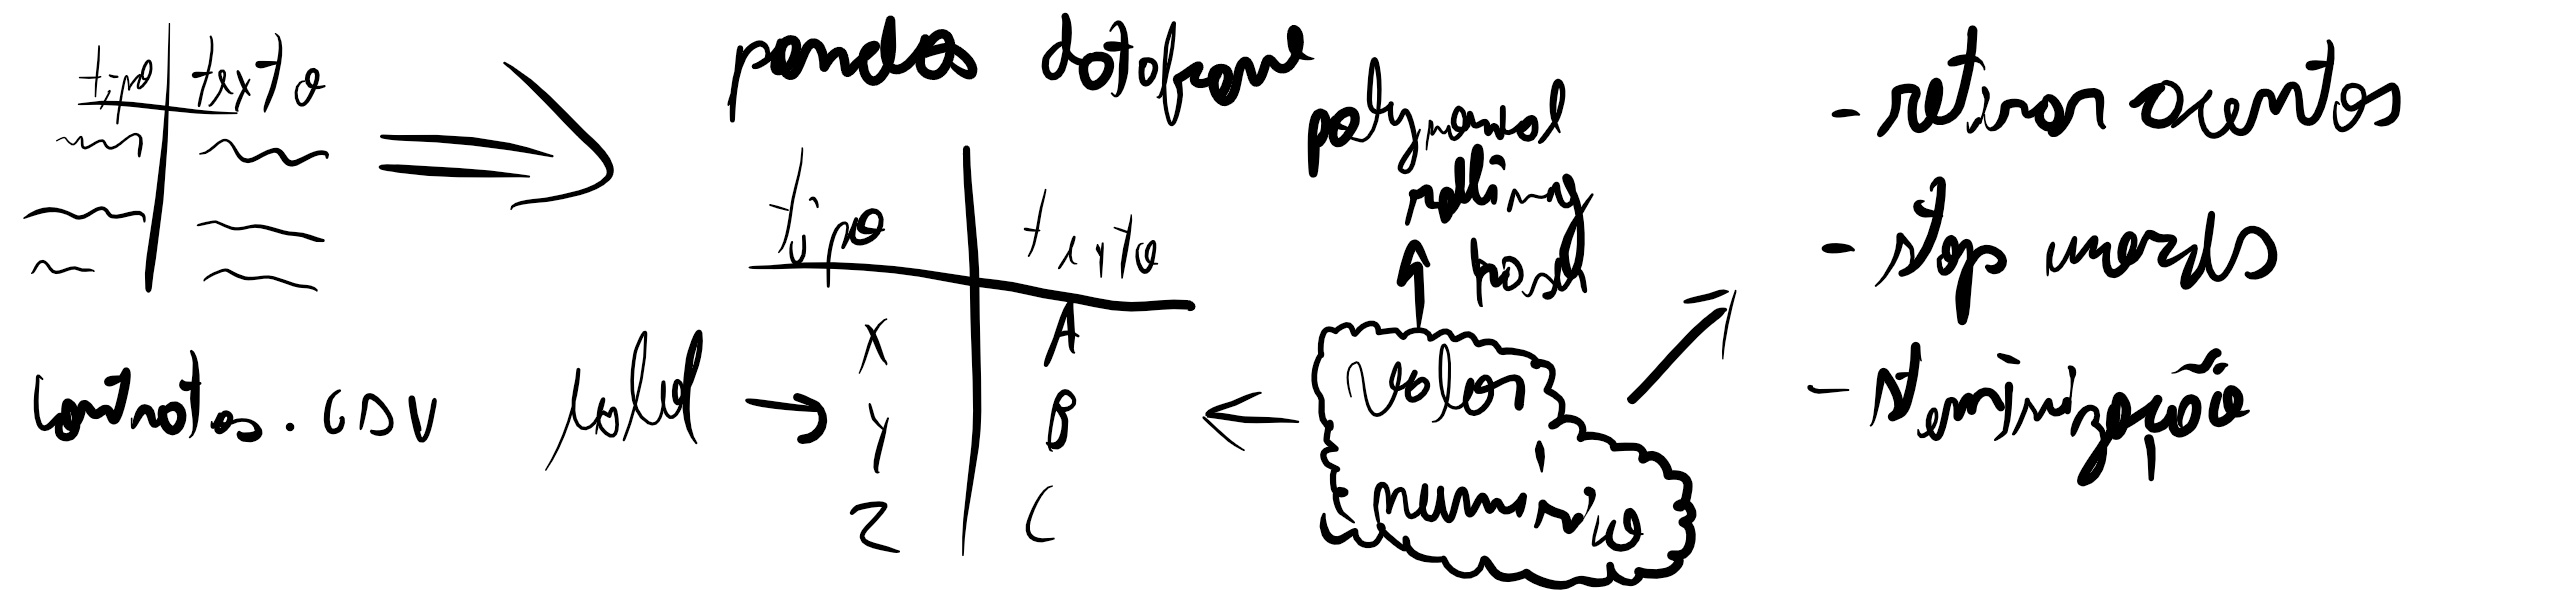

# Limpando para classificar apenas algumas entidades 🧹

Ou seja, apenas: *extrato de contrato, extrato de convênio, aditamento de extrato de contrato, aviso de licitação, aviso de suspensão de licitação, aviso de revogação/anulação de licitação.* 

In [3]:
# retorna dataframe com apenas as entidades passadas no argumento
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

# extrato de contrato -> EXTRATO_CONTRATO
# extrato de convênio -> EXTRATO_CONVENIO
# aditamento de extrato de contrato -> EXTRATO_ADITAMENTO_CONTRATUAL
# aviso de licitação -> AVISO_LICITACAO
# aviso de suspensão de licitação -> AVISO_SUSPENSAO_LICITACAO
# aviso de revogação/anulação de licitação -> AVISO_ANUL_REV_LICITACAO


df = filter_rows_by_values(raw_df, "tipo_ent", ["EXTRATO_CONTRATO", 
                                                "EXTRATO_CONVENIO",
                                                "EXTRATO_ADITAMENTO_CONTRATUAL",
                                                "AVISO_LICITACAO",
                                                "AVISO_SUSPENSAO_LICITACAO",
                                                "AVISO_ANUL_REV_LICITACAO"])

df


,index,id_dodf,tipo_rel,id_rel,anotador_rel,timestamp_rel,tipo_ent,id_ent,anotador_ent,timestamp_ent,offset,length,texto
10,10,12_22.11.2018,REL_ADITAMENTO_CONTRATO,R13,micael_filipe,2022-04-03T11:45:10Z,EXTRATO_ADITAMENTO_CONTRATUAL,473,micael_filipe,2022-04-03T11:45:03Z,575470,1503,EXTRATO SEGUNDO TERMO ADITIVO DO CONTRATO DE P...
16,16,13_26.11.2019,REL_AVISO_LICITACAO,R5,antonio_carlos,2022-04-03T22:29:44Z,AVISO_LICITACAO,169,antonio_carlos,2022-04-03T22:29:38Z,611101,886,AVISO DE LICITACAO\nProcedimento Licitatorio E...
18,18,19_12.12.2019,REL_ADITAMENTO_CONTRATO,R3,matheus_santos,2022-03-30T20:38:02Z,EXTRATO_ADITAMENTO_CONTRATUAL,138,matheus_santos,2022-02-23T01:30:32Z,314783,845,EXTRATO DE TERMO ADITIVO DA ATA DE REGISTRO\nD...
36,36,11_30.10.2019,REL_AVISO_LICITACAO,R30,antonio_carlos,2022-04-03T19:05:29Z,AVISO_LICITACAO,95,antonio_carlos,2022-02-22T14:04:24Z,513393,778,AVISO DE LICITACAO\nPREGAO ELETRONICO PE No 26...
51,51,1_31.5.2019,REL_AVISO_LICITACAO,R26,vinicius_borges,2022-04-06T14:51:35Z,AVISO_LICITACAO,319,vinicius_borges,2022-04-06T14:51:26Z,1325553,1339,AVISO DE LICITACAO\nPREGAO ELETRONICO PE No 14...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,6656,15_28.11.2019,REL_ADITAMENTO_CONTRATO,R6,matheus_santos,2022-03-28T19:53:10Z,EXTRATO_ADITAMENTO_CONTRATUAL,92,matheus_santos,2022-02-19T02:31:01Z,589692,802,EXTRATO DO SEGUNDO TERMO ADITIVO AO CONTRATO N...
6661,6661,12_22.11.2018,REL_EXTRATO_CONTRATO,R3,alexandre_santana,2022-03-08T13:34:21Z,EXTRATO_CONTRATO,399,alexandre_santana,2022-02-23T14:39:04Z,572972,1187,EXTRATO DO CONTRATO No 32/2018\nAQUISICAO DE B...
6673,6673,6_24.7.2019,REL_ADITAMENTO_CONTRATO,R14,micael_filipe,2022-04-03T12:41:38Z,EXTRATO_ADITAMENTO_CONTRATUAL,169,micael_filipe,2022-04-03T12:41:33Z,874246,740,EXTRATO DO PRIMEIRO TERMO ADITIVO AO CONTRATO ...
6676,6676,21_16.12.2019.1,REL_ADITAMENTO_CONTRATO,R6,matheus_santos,2022-04-02T21:19:37Z,EXTRATO_ADITAMENTO_CONTRATUAL,341,matheus_santos,2022-03-04T17:32:30Z,493745,1216,EXTRATO DO SEGUNDO TERMO ADITIVO AO CONTRATO D...


### Nem sempre é necessária a limpeza total dos dados! 😕

#### ["Aqui entidades numéricas, capitalização e pontuação podem ser importantes. Por isso, pensando em uma tarefa de classificação, faz sentido não adotar alguns dos passos de pré-processamento que normalmente são feitos."](https://colab.research.google.com/drive/1zjcTnNNLlbM3BH3zEAAnQSJjlUmTP8K2?usp=sharing#scrollTo=XP3U0XWKsmSf://)

In [4]:
# classificação em inteiro

# EXTRATO_CONTRATO = 0
# EXTRATO_CONVENIO = 1
# EXTRATO_ADITAMENTO_CONTRATUAL = 2
# AVISO_LICITACAO = 3
# AVISO_SUSPENSAO_LICITACAO = 4
# AVISO_ANUL_REV_LICITACAO = 5

df=df.replace(to_replace="EXTRATO_CONTRATO",value="0")
df=df.replace(to_replace="EXTRATO_CONVENIO",value="1")
df=df.replace(to_replace="EXTRATO_ADITAMENTO_CONTRATUAL",value="2")
df=df.replace(to_replace="AVISO_LICITACAO",value="3")
df=df.replace(to_replace="AVISO_SUSPENSAO_LICITACAO",value="4")
df=df.replace(to_replace="AVISO_ANUL_REV_LICITACAO",value="5")


In [5]:
# 80% vai ser treino, 20% vai ser teste
# 0.8 * 726 = 580
# até o índice 580 vai ser treino, depois disso é teste

# é o dado
x = df.filter(['texto'])

x_train_raw = x.iloc[:580] 
x_test_raw = x.iloc[580:]  

# é o resultado do dado
y = df.filter(['tipo_ent'])

y_train_raw = y.iloc[:580]
y_test_raw = y.iloc[580:]


valores_distintos = y_train_raw['tipo_ent'].nunique() 
valores_distintos_nao_nulos = y_train_raw['tipo_ent'].count()

print(valores_distintos)              # entidades possíveis
print(valores_distintos_nao_nulos)    # repetições


6
580


### Conversão para "one-hot codes" 🔥

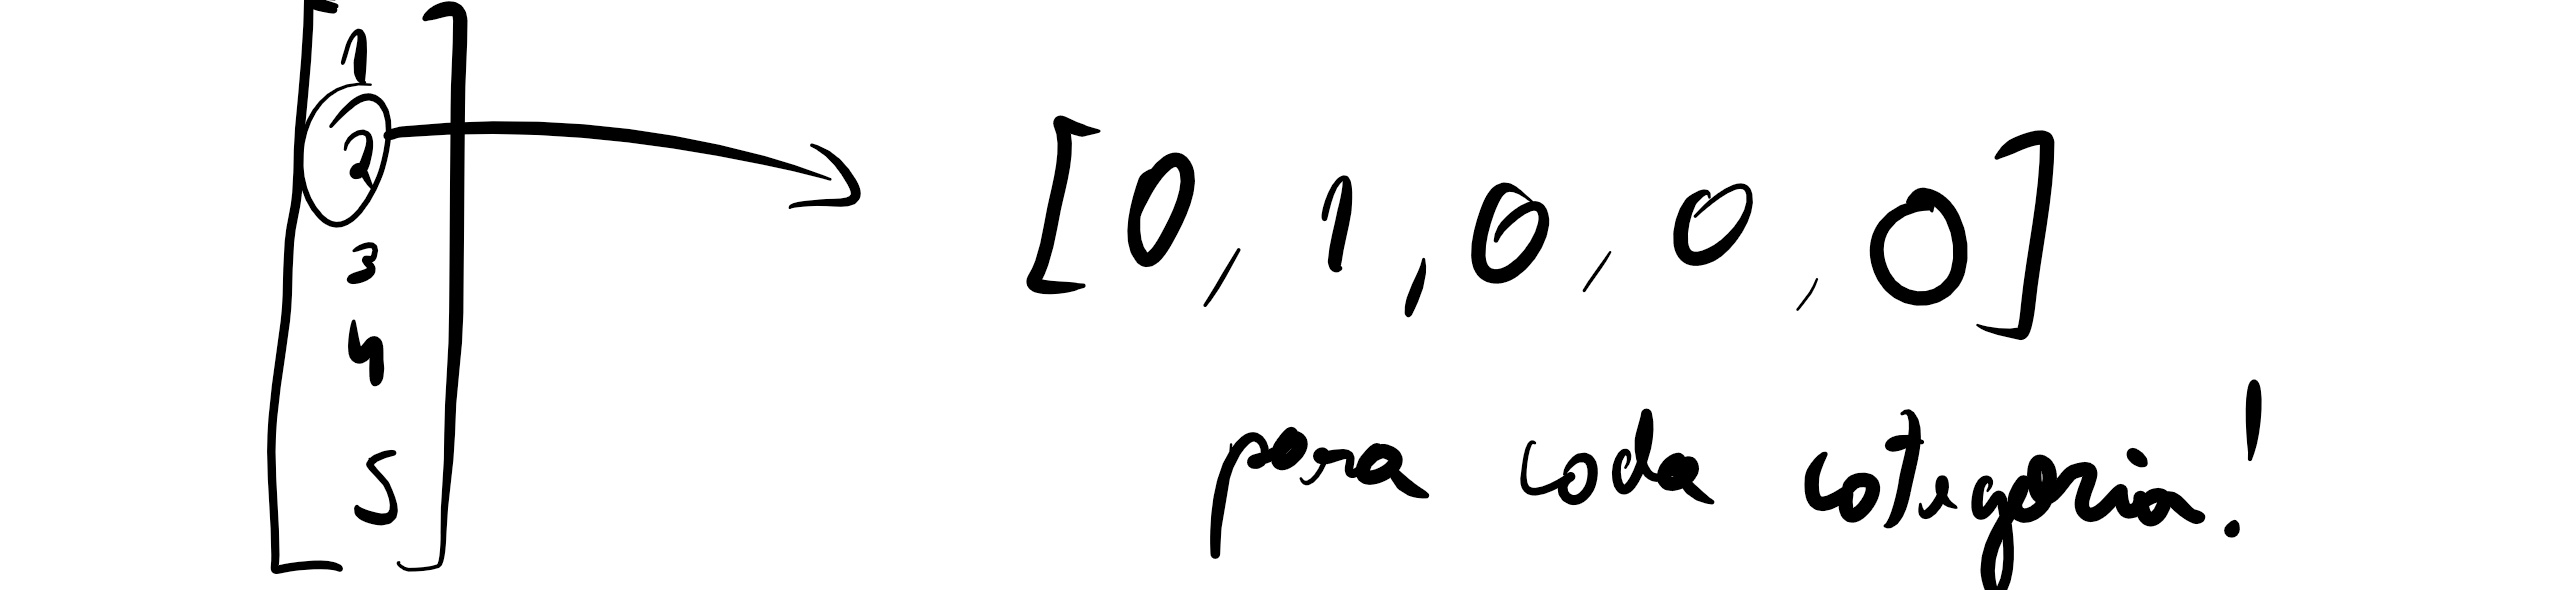

In [6]:
from tensorflow import keras

# conversão para "one-hot codes"

# to_categorical -> vai de 0 até "valores_distintos - 1" como uma possibilidade
# esses dados começam em 1, vou subtrair 1 de tudo, para 0 virar uma categoria

y_train = keras.utils.to_categorical(y_train_raw, valores_distintos)
y_test = keras.utils.to_categorical(y_test_raw, valores_distintos)

print(y_train[0])


[0. 0. 1. 0. 0. 0.]


### Testarei inicialmente a stemnminzação, retirada de acentos (para garantir) e a retirada de stopwords da parte do texto. Na retirada de stopwords, não contarei com a retirada de "\n".

In [7]:
!pip install unidecode
import unidecode

     |████████████████████████████████| 235 kB 5.3 MB/s 


In [8]:
# retirada de acentos

x_train_raw['texto'] = x_train_raw['texto'].apply(lambda x: ' '.join([unidecode.unidecode(termo) for termo in x.split()]))
x_test_raw['texto'] = x_test_raw['texto'].apply(lambda x: ' '.join([unidecode.unidecode(termo) for termo in x.split()]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# retirada de stopwords

x_train_raw['texto'] = x_train_raw['texto'].apply(lambda x: ' '.join([termo for termo in x.split() if termo not in stopwords]))
x_test_raw['texto'] = x_test_raw['texto'].apply(lambda x: ' '.join([termo for termo in x.split() if termo not in stopwords]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [12]:
# steminização

x_train_raw['texto'] = x_train_raw['texto'].apply(lambda x: ' '.join(stemmer.stem(termo) for termo in x.split()))
x_test_raw['texto'] = x_test_raw['texto'].apply(lambda x: ' '.join(stemmer.stem(termo) for termo in x.split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Mapeando texto em valores numéricos para alimentar a rede neural 🦜

Nova tentativa: uso de Hashing Vectorizer.

In [13]:
# Limpeza pronta!

# agora quero mapear cada palavra em x para um valor inteiro nessa lista

from sklearn.feature_extraction.text import HashingVectorizer

def retorna_valor(frase):
  
  input = []
  input.append(str(frase))
  vectorizer = HashingVectorizer(n_features = 7)
  vector = vectorizer.transform(input)

  resultado_array = vector.toarray()
  #resultado_array = resultado_array.pop(0)

  print(resultado_array)

  # agora temos resultados como [[ 0. 0. 0. 0. 0. -1. 0.]] e 	[[ 0.70710678 -0.70710678 0. 0. 0. 0. 0. ]]
  # vou pegar esse resultado e gerar um numero float fazendo uma soma ponderada
  # numero_final = pos[0]*10 + pos[1]*100 + pos[2]*1000 ...
  # intenção é agrupar inputs juntos em valores de inteiros equivalentes 

  multiplicador = 10
  resultado = 0

  for i in range(7):
    
    resultado = resultado + resultado_array[0][i] * multiplicador
    multiplicador = multiplicador * 100


  return resultado

x_train = x_train_raw
x_test = x_test_raw

x_train['texto'] = x_train_raw['texto'].apply(retorna_valor)
x_test['texto'] = x_test_raw['texto'].apply(retorna_valor)

#x_train['texto']
#x_test['texto']


# vamos realizar a visualização do que vai servir de treino
#x_train

[[-0.13206764 -0.26413527  0.13206764 -0.57229309  0.17609018 -0.61631563
   0.39620291]]
[[ 0.77151675  0.3086067   0.3086067   0.3086067  -0.3086067  -0.15430335
   0.        ]]
[[ 0.6415003   0.25660012 -0.06415003 -0.12830006 -0.32075015 -0.25660012
   0.57735027]]
[[ 0.17556172  0.23408229  0.52668516  0.52668516 -0.05852057 -0.58520574
  -0.11704115]]
[[-0.30323922 -0.15161961  0.60647843  0.60647843  0.22742941 -0.30323922
  -0.0758098 ]]
[[-0.53452248  0.35634832 -0.26726124  0.17817416  0.35634832 -0.53452248
  -0.26726124]]
[[ 0.15476465  0.30952929  0.30952929  0.         -0.07738232 -0.54167626
   0.69644091]]
[[ 0.73484692  0.32659863 -0.08164966  0.32659863  0.32659863 -0.16329932
   0.32659863]]
[[-0.0745356   0.2981424  -0.52174919  0.52174919  0.1490712   0.4472136
   0.372678  ]]
[[ 0.13867505  0.06933752  0.20801257  0.         -0.5547002  -0.48536267
   0.62403772]]
[[-0.31448545  0.52414242  0.         -0.41931393  0.41931393  0.31448545
   0.41931393]]
[[-0.146647

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[[-0.79772404  0.11396058  0.          0.11396058  0.45584231 -0.11396058
  -0.34188173]]
[[ 0.31799936 -0.21199958 -0.31799936  0.52999894 -0.42399915 -0.52999894
   0.10599979]]
[[ 0.11058147  0.         -0.29488391  0.3317444   0.25802342  0.25802342
   0.81093076]]
[[ 0.08481889  0.16963779  0.59373225  0.16963779 -0.25445668 -0.50891336
  -0.50891336]]
[[ 0.3441236   0.63089327  0.22941573 -0.05735393 -0.40147753 -0.5161854
   0.        ]]
[[ 0.08304548  0.08304548  0.08304548  0.08304548  0.91350028 -0.33218192
   0.16609096]]
[[ 0.         -0.0978232  -0.0978232  -0.1467348   0.0489116  -0.58693919
   0.78258558]]
[[ 0.06052275  0.30261377 -0.60522753  0.18156826  0.42365927 -0.30261377
   0.48418203]]
[[ 0.21538745  0.14359163  0.07179582  0.50257071 -0.35897908 -0.35897908
  -0.64616234]]
[[ 0.49319696  0.32879797 -0.16439899  0.16439899 -0.32879797 -0.49319696
  -0.49319696]]
[[ 0.29002095  0.1933473   0.67671554 -0.29002095  0.3866946  -0.3866946
   0.1933473 ]]
[[-0.276685

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# deve-se mapear o menor e o maior valor para um range entre (x e y)

from scipy.interpolate import interp1d

max_index_train = x_train['texto'].max()
max_index_test = x_test['texto'].max()

if(max_index_train > max_index_test):
  max = max_index_train
else:
  max = max_index_test

min_index_train = x_train['texto'].max()
min_index_test = x_test['texto'].max()

if(min_index_train < min_index_test):
  min = min_index_train
else:
  min = min_index_test

print("Maior valor retornado -> " + str(max))
print("Menor valor retornado -> " + str(min))

def new_map(s):
  a = [min, max]
  b = [0, 4096]
  (a1, a2), (b1, b2) = a, b
  return  b1 + ((s - a1) * (b2 - b1) // (a2 - a1))


x_train['texto'] = x_train['texto'].apply(new_map)
x_test['texto'] = x_test['texto'].apply(new_map)


Maior valor retornado -> 9566978834253.094
Menor valor retornado -> 9335845743154.898


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Vendo a transformação de string para inteiro na tela

#### Espero uma distribuição mais ou menos uniforme?

In [15]:
# vamos realizar a visualização do que vai servir de teste

x_test

,texto
5386,-43713.0
5392,-111447.0
5413,-119397.0
5418,-88118.0
5423,-72922.0
...,...
6656,-61190.0
6661,-134609.0
6673,-61621.0
6676,-21323.0


In [16]:
# vamos realizar a visualização do que vai servir de treino

x_train

,texto
10,-96321.0
16,-165724.0
18,-63591.0
36,-187224.0
51,-179412.0
...,...
5330,-148158.0
5335,-49632.0
5373,-98505.0
5383,-27542.0


In [17]:
print(x_train.shape)
print(x_test.shape)

(580, 1)
(146, 1)


In [18]:
# Definindo shape correto

import numpy 

print(y_train.shape)


(580, 6)


# RNN: Recurrent Neural Network ♟

### Nesse tipo de implementação, sequência e ordem importam!

#### Qual deveria ser a proporção escolhida perfeita para essa rede neural é uma pergunta complexa.


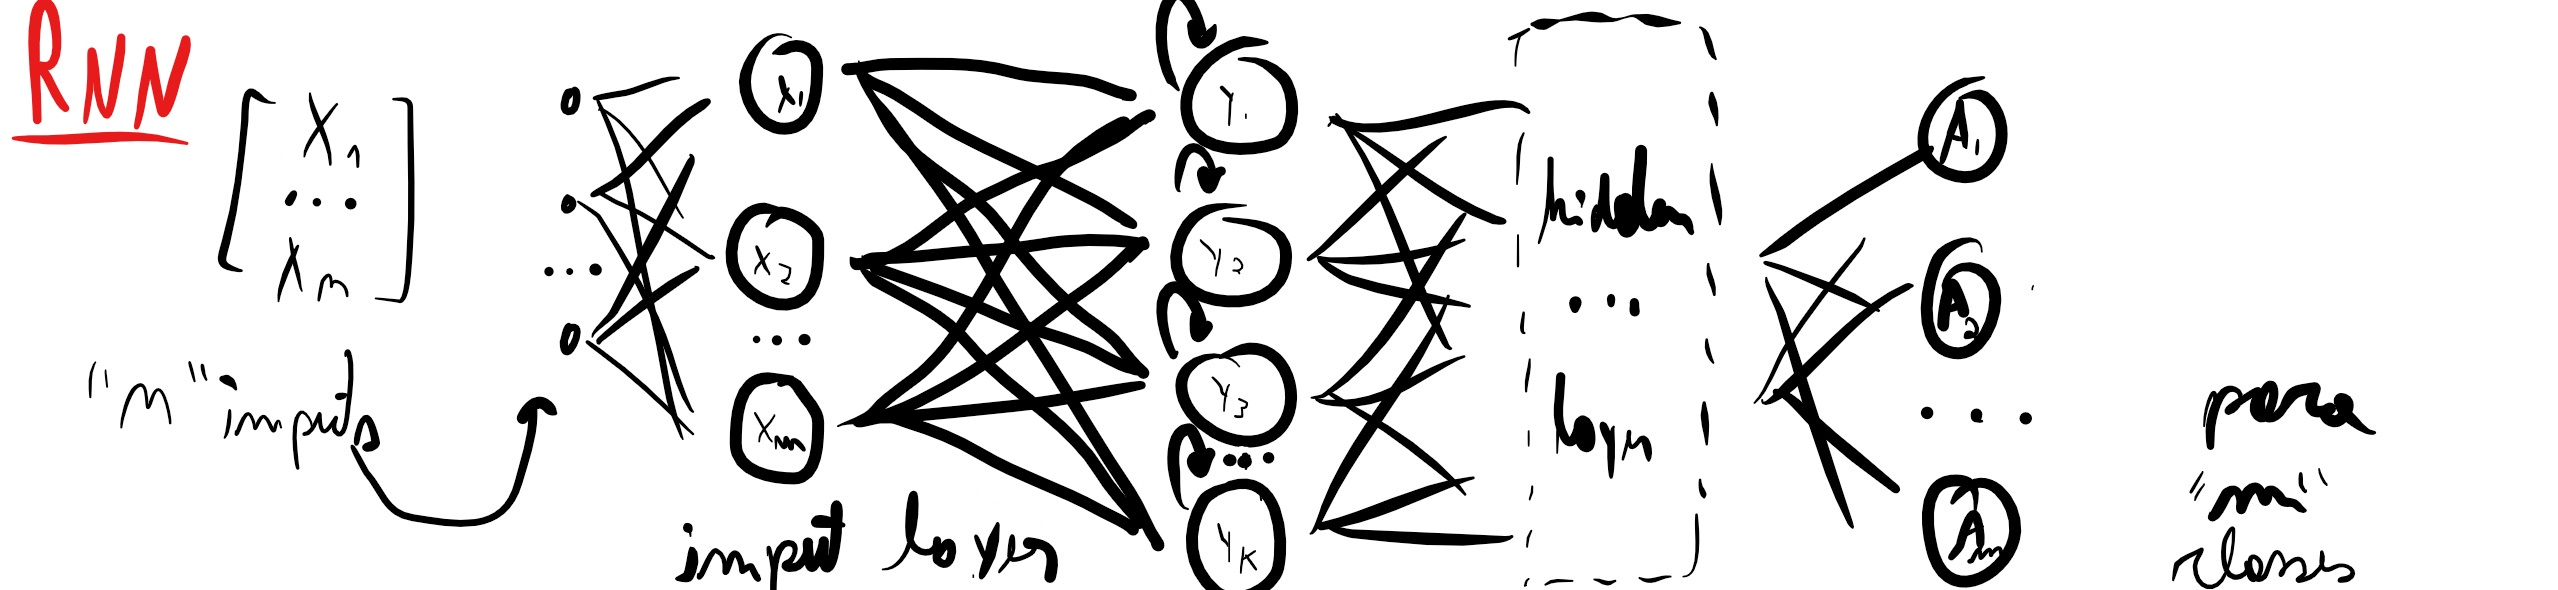

In [19]:
# Dimensões adaptadas para o input

x_train = np.expand_dims(x_train, axis=-1)
y_train = np.expand_dims(y_train, axis=1)


x_test = np.expand_dims(x_test, axis=-1)
y_test = np.expand_dims(y_test, axis=1)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(580, 1, 1)
(580, 1, 6)
(146, 1, 1)
(146, 1, 6)


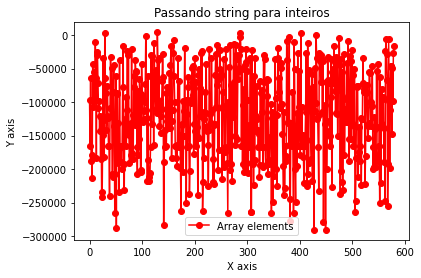

In [20]:
import matplotlib.pyplot as plt


x = np.array(range(0, 580))

y = np.array([])

for i in range(580):
  y = numpy.append(y, x_train[i])

plt.title("Passando string para inteiros")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color = "red", marker = "o", label = "Array elements")
plt.legend()
plt.show()

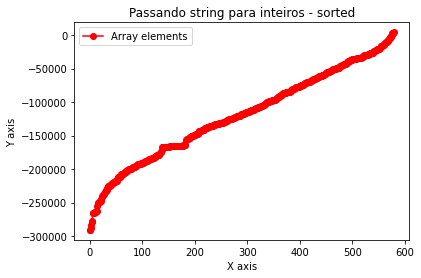

In [21]:
z = np.sort(y)

plt.title("Passando string para inteiros - sorted")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, z, color = "red", marker = "o", label = "Array elements")
plt.legend()
plt.show()

Era isso que eu esperava, no geral alguma noção de uniformidade entre as entradas.

# Criando a rede neural 🧠 

## Dúvida: como deve ser dada a arquitetura da minha rede? 🤔

A rede neural terá uma camada de input com tamanho proporcional à entrada, e uma camada de saída com tamanho proporcional à classificação que será feita. 

Acertar a quantidade de "hidden layers" e quantos nós ela deve ter também é uma tarefa complexa. Dados linearmente separáveis não precisam de uma rede neural com "hidden layer", o que certamente não é este caso. Errar "para mais" não é uma solução otimizada assim como "errar para menos" também não é. 

[Adotarei este cálculo](https://stackoverflow.com/questions/10565868/multi-layer-perceptron-mlp-architecture-criteria-for-choosing-number-of-hidde) para ter um chute decente de quantos nós devo adotar:

(num inputs + num outputs) x 2/3

(726 entradas + 7 classificações) x 2/3 = 489

Arredondando ordens de grandes após alguns testes, farei uma rede com a seguinte estrutura de "hidden layers":

512 x 512 x 512 x 128

In [29]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Input(shape = (T,D)) for RNN
# T = T is length of time sequence
# D = D is the number of features

# x_train.shape[1:] => (1,)

# input_shape=(x_train.shape[1:])
# input_shape=(5356, 1)

model = Sequential()

model.add(LSTM(512, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(512, activation='relu', return_sequences=True))
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(valores_distintos, activation='softmax'))




In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((580, 1, 1), (580, 1, 6), (146, 1, 1), (146, 1, 6))

# Treinamento da RNN 🏋🏻‍♀️ 



In [35]:
print(x_train.shape)
print(y_train.shape)

#x_test = np.expand_dims(x_test, axis=-1)
#y_test = np.expand_dims(y_test, axis=1)

opt = tf.keras.optimizers.Adam(learning_rate=0.00001, decay=1e-3)

model.compile(
   loss='categorical_crossentropy',
   optimizer=opt,
   metrics=['accuracy'],
)

history = model.fit(x_train,
          y_train,
          epochs=2000,
          validation_data=(x_test, y_test))

(580, 1, 1)
(580, 1, 6)
Epoch 1/2000
19/19 [==============================] - 5s 86ms/step - loss: 27.7967 - accuracy: 0.3931 - val_loss: 2.2109 - val_accuracy: 0.3356
Epoch 2/2000
19/19 [==============================] - 1s 59ms/step - loss: 31.0105 - accuracy: 0.3672 - val_loss: 2.5578 - val_accuracy: 0.3219
Epoch 3/2000
19/19 [==============================] - 1s 59ms/step - loss: 26.7729 - accuracy: 0.3552 - val_loss: 2.7153 - val_accuracy: 0.3082
Epoch 4/2000
19/19 [==============================] - 1s 61ms/step - loss: 31.2529 - accuracy: 0.3586 - val_loss: 2.7905 - val_accuracy: 0.3219
Epoch 5/2000
19/19 [==============================] - 1s 58ms/step - loss: 26.4441 - accuracy: 0.3638 - val_loss: 2.7987 - val_accuracy: 0.3288
Epoch 6/2000
19/19 [==============================] - 1s 58ms/step - loss: 26.2253 - accuracy: 0.3569 - val_loss: 2.8403 - val_accuracy: 0.2945
Epoch 7/2000
19/19 [==============================] - 1s 57ms/step - loss: 28.3530 - accuracy: 0.3414 - val_loss

# Avaliação do modelo 🤙🏻

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)


# Resultados 😳


In [37]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7332756519317627
Test accuracy: 0.5410959124565125


In [38]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 32.74559861421585)

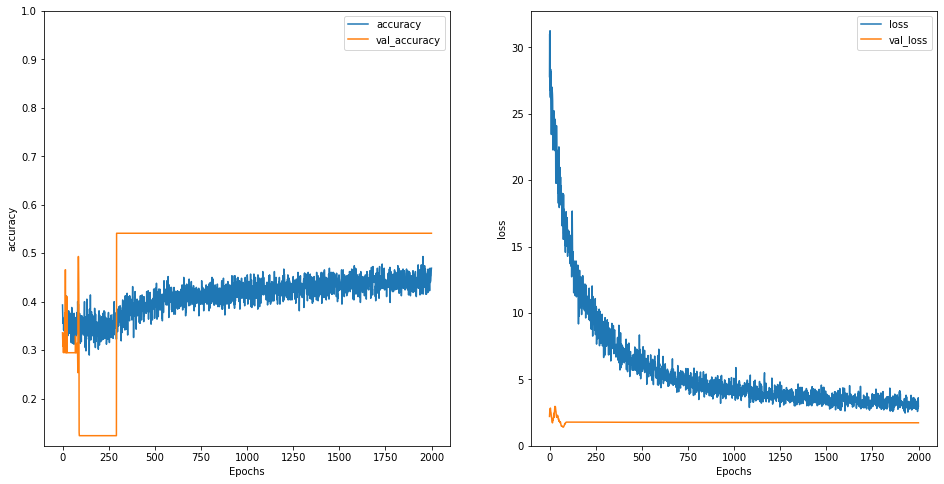

In [39]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
#plt.xticks(range(0,20))
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
#plt.xticks(range(0,20))